So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique -> 

### Minimum loss on you regression task and the reason you used this algorithm/technique ->

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
read_red= pd.read_csv('winequality-red.csv',delimiter=';')
read_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
#adding a column to distinguish between red and white wine
#assigninng 0 for red wine
read_red['wine']=pd.Series(np.zeros(1599),index= read_red.index) 
read_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [20]:
read_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,0.0


In [21]:
read_white= pd.read_csv('winequality-white.csv',delimiter=';')
read_white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [22]:
#assigninng 1 for white wine
read_white['wine']= pd.Series(np.ones(4898),index=read_white.index)
read_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0


In [23]:
read_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.0


In [24]:
#concatinating the two data frames into one
data= pd.concat([read_red,read_white], ignore_index= True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [25]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [26]:
#checking correlation
correlation = data.corr()['quality'].drop('quality')
print(correlation)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
wine                    0.119323
Name: quality, dtype: float64


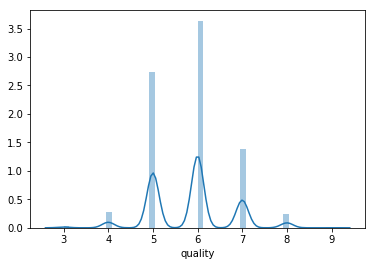

In [27]:
sns.distplot(data['quality'])

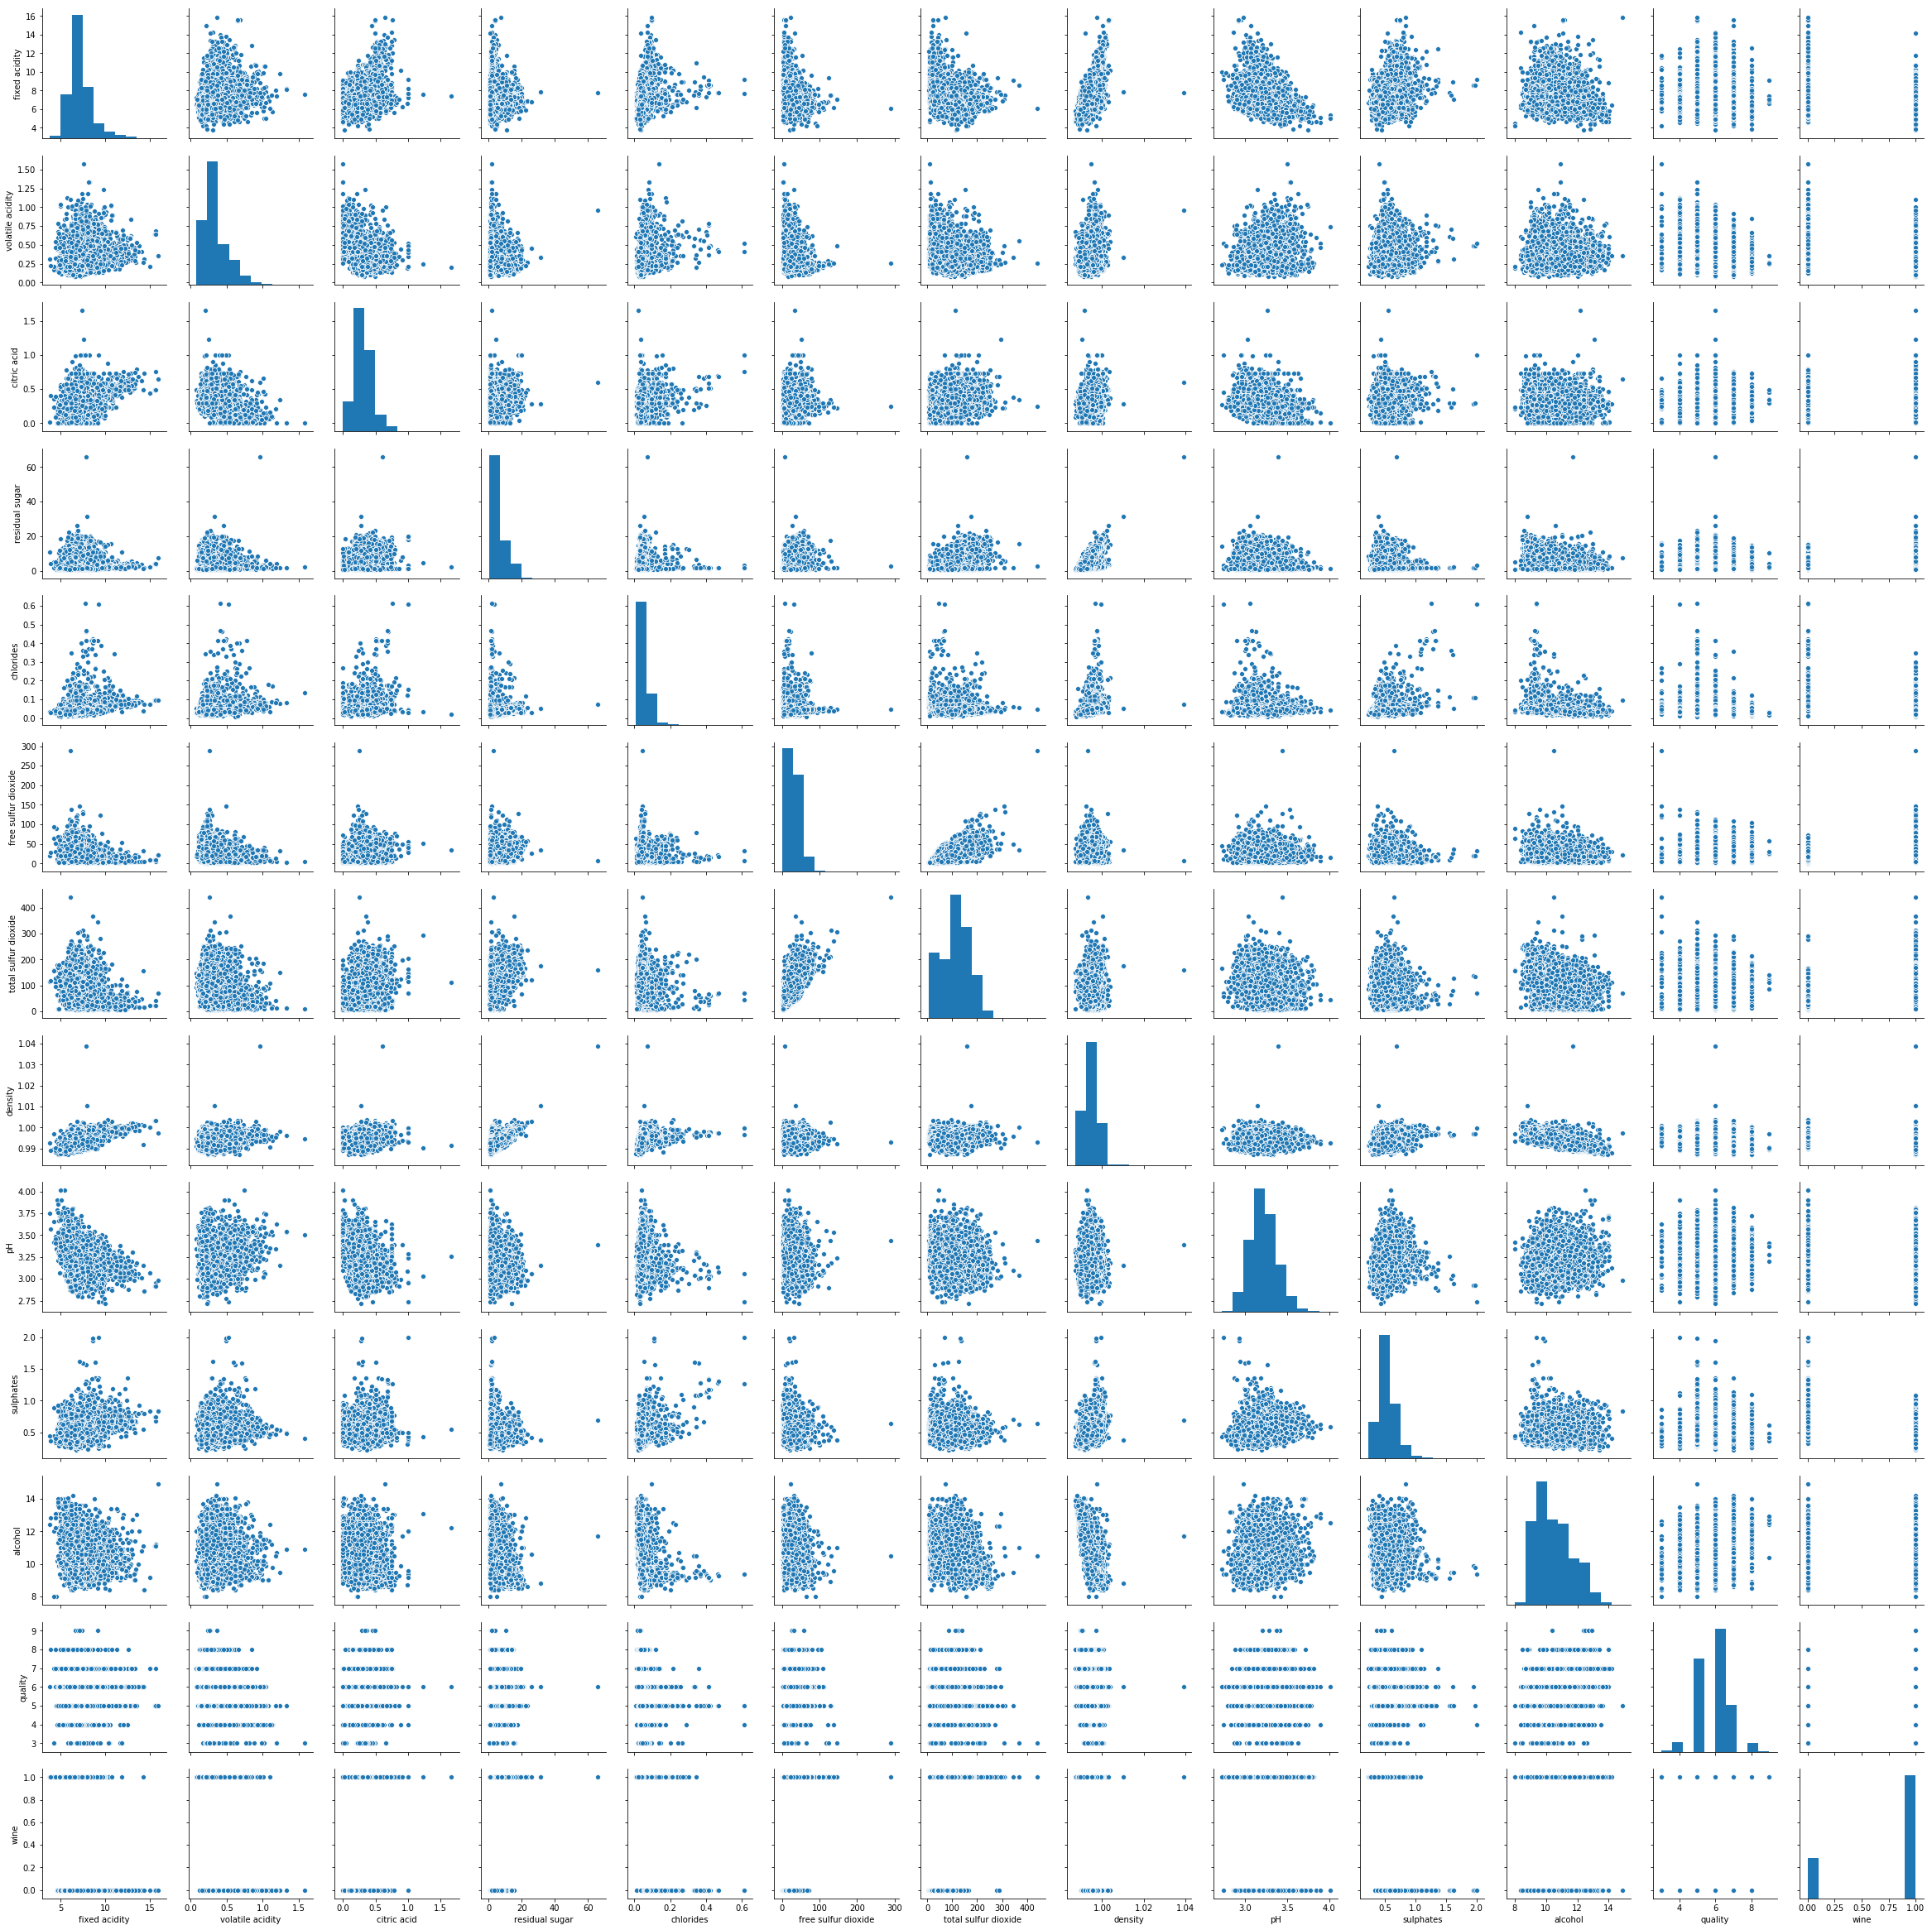

In [29]:
sns.pairplot(data)

In [31]:
X= data[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'wine']]
y= data['quality']

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=101)

In [39]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))

In [41]:
#checking mean squared error for different regression algorithms
checks=[]
for check,model in models:
    model.fit(X_train,y_train)
    prediction= model.predict(X_test)
    a= metrics.mean_squared_error(y_test,prediction) 
    print("%s: %f "%(check, a))

LR: 0.530083 
KNR: 0.642646 
DTR: 0.683590 


In [42]:
#Linear regression has least mean squared error. Therefore, it is best algorithm among these.
l= LinearRegression()

In [43]:
#fit training data to algorithm
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
print(l.intercept_)

93.76786141747309


In [47]:
coeff_df = pd.DataFrame(l.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.064735
volatile acidity,-1.486237
citric acid,-0.032236
residual sugar,0.057839
chlorides,-1.216678
free sulfur dioxide,0.005065
total sulfur dioxide,-0.001675
density,-92.629104
pH,0.452420
sulphates,0.795018


In [48]:
prediction= l.predict(X_test)

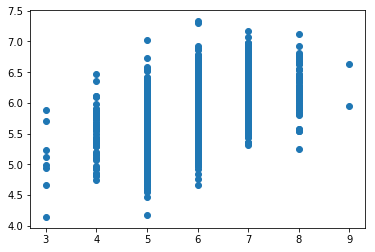

In [50]:
plt.scatter(y_test,prediction)

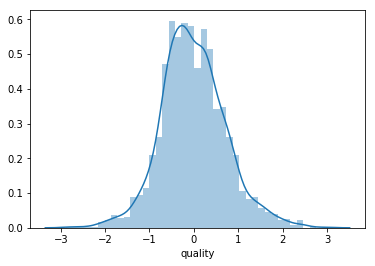

In [51]:
sns.distplot(y_test-prediction)

In [52]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 0.7280680867022545


In [53]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [55]:
models=[]
models.append(('SVM',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('KNC',KNeighborsClassifier()))

In [56]:
#checking accuracy score of different classification algorithms
cams=[]
for cam,model in models:
    model.fit(X_train,y_train)
    pre= model.predict(X_test)
    g= metrics.accuracy_score(pre,y_test)
    print("%s: %f "%(cam, g))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM: 0.541538 
GNB: 0.423077 
KNC: 0.480000 


In [58]:
#Since SVM has best accuracy score, therefore it is best algorithm among these
clf= SVC()

In [59]:
clf.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
predictions= clf.predict(X_test)

In [62]:
acc= metrics.accuracy_score(predictions,y_test)
acc

0.5415384615384615